We are going to work on a image classification using the famous fashion brand Zalando, which is a publicly traded German online retailer of shoes, fashion and beauty active across Europe. The company was founded in 2008 by David Schneider and Robert Gentz and has more than 50 million active users in 25 European markets.
![](https://s.id/zalando)

## Bối cảnh
Fashion-MNIST là tập dữ liệu gồm các hình ảnh bài viết của Zalando—bao gồm tập huấn luyện gồm 60.000 ví dụ và tập kiểm tra gồm 10.000 ví dụ. Mỗi ví dụ là một hình ảnh thang độ xám 28x28, được liên kết với nhãn từ 10 lớp. Zalando dự định Fashion-MNIST sẽ đóng vai trò thay thế trực tiếp cho bộ dữ liệu MNIST ban đầu để đo điểm chuẩn cho các thuật toán máy học. Nó chia sẻ cùng kích thước hình ảnh và cấu trúc phân tách đào tạo và thử nghiệm.

Bộ dữ liệu MNIST ban đầu chứa rất nhiều chữ số viết tay. Các thành viên của cộng đồng AI/ML/Khoa học dữ liệu yêu thích bộ dữ liệu này và sử dụng nó làm điểm chuẩn để xác thực các thuật toán của họ. Trên thực tế, MNIST thường là tập dữ liệu đầu tiên mà các nhà nghiên cứu thử. Họ nói: "Nếu nó không hoạt động trên MNIST, nó sẽ không hoạt động". "Chà, nếu nó hoạt động trên MNIST, nó vẫn có thể thất bại với những người khác."

Zalando tìm cách thay thế bộ dữ liệu gốc MNIST

## Nội dung
Mỗi hình ảnh có chiều cao 28 pixel và chiều rộng 28 pixel, tổng cộng là `784 pixel`. Mỗi pixel có một giá trị pixel duy nhất được liên kết với nó, cho biết độ sáng hoặc độ tối của pixel đó, với các số cao hơn có nghĩa là tối hơn. `Giá trị pixel này là một số nguyên từ 0 đến 255`. 

Tập dữ liệu huấn luyện và kiểm tra có 785 cột. Cột đầu tiên bao gồm các `labels` và đại diện cho mặt hàng quần áo. Các cột còn lại chứa giá trị pixel của hình ảnh được liên kết.

Để định vị một pixel trên ảnh, giả sử rằng chúng ta đã phân tách x thành `x = i * 28 + j`, trong đó i và j là các số nguyên trong khoảng từ 0 đến 27. Pixel nằm trên hàng i và cột j của ma trận 28 x 28 .
Ví dụ: pixel31 cho biết pixel nằm ở cột thứ tư từ bên trái (3) và hàng thứ hai (1) từ trên xuống.

![](https://datasets.activeloop.ai/wp-content/uploads/2022/09/Fashion-MNIST-dataset-Activeloop-Platform-visualization-image.webp)

### Labels

The first column, label ranges from 0 to 9  and they represent these fashion items. Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

Labels: áo thun/áo, 
   ,quần dài
   ,áo len
   ,Đầm
   ,Áo choàng
   ,dép
   ,Áo sơ mi
   ,giày thể thao
   ,Cái túi
   ,bốt đến mắt cá chân
   
Ta có thể thấy phần còn lại của các cột là giá trị pixel, hãy nhìn vào hàng đầu tiên, chúng tôi có nhãn 2 có nghĩa là đó có nghĩa là áo chui đầu và các pixel này có nghĩa là giá trị pixel của hình ảnh áo chui đầu sau khi bạn đào tạo mô hình này nếu bạn nhập hình ảnh của bất kỳ mục nào trong số này, mô hình sẽ có thể phát hiện ra nó và chắc chắn trước khi bạn nhập ảnh vào mô hình máy học, bạn phải chuyển đổi nó thành giá trị pixel nhưng may mắn thay cho tập dữ liệu này, chúng tôi đã có ảnh trong pixel vì vậy tôi sẽ chỉ cho bạn cách các dạng pixel này có thể tạo thành một bức tranh.

we are going to use `fashion_mnist_train` for training the model and `fashion_mnist_test` for testing or evaluating the model

In [25]:
import pandas as pd

In [27]:
train = pd.read_csv('fashion_mnist_train.csv')
train = train[:900]

In [29]:
test = pd.read_csv('fashion_mnist_test.csv')
test = test[:100]

In [30]:
X_train = train.drop(columns ='label') 
y_train = train['label'] 

X_test = test.drop(columns = 'label') 
y_test = test['label']

In [31]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0,0,0,0,0,0,0,0,0,0,...,109,130,69,77,83,96,62,18,8,0
896,0,0,0,0,0,0,0,0,0,0,...,172,74,0,0,0,0,0,0,0,0
897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,41,55,43,1,0,0
898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X_train_list = X_train.values.tolist()
print(X_train_list[0:2])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 62, 61, 21, 29, 23, 51, 136, 61, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 88, 201, 228, 225, 255, 115, 62, 137, 255, 235, 222, 255, 135, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 47, 252, 234, 238, 224, 215, 215, 229, 108, 180, 207, 214, 224, 231, 249, 254, 45, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 214, 222, 210, 213, 224, 225, 217, 220, 254, 233, 219, 221, 217, 223, 221, 240, 254, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 128, 237, 207, 224, 224, 207, 216, 214, 210, 208, 211, 221, 208, 219, 213, 226, 211, 237, 150, 0, 0, 0, 0, 0, 0, 2, 0, 0, 237, 222, 215, 207, 210, 212, 213, 206, 214, 213, 214, 213, 210, 215, 214, 206, 199, 218, 255, 13, 0, 2, 0, 0, 0, 4, 0, 85, 228, 210, 218, 200, 211, 208, 203, 215, 210, 209, 209

You can see it is converted to a two dimensional list. Each of the images pixel values are  just one dimensional we're going to reshape them as `three-dimensional` before we will be able to use and make it the image. 

In [33]:
import numpy as np
import matplotlib.pyplot as plt

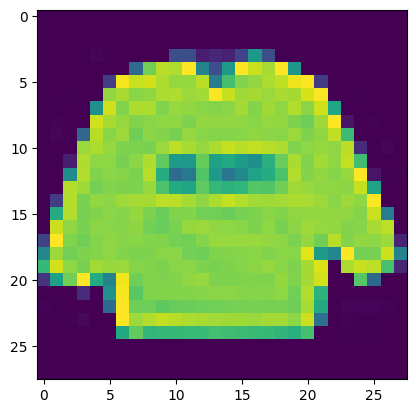

In [34]:
#reshape to 28  by 28  by 1,
plt.imshow(np.reshape(X_train_list[0], (28, 28, 1)));

let's see the first label, which is a 2, a pullover. Similarly, we can see the second label, which is a 9, an ankle boot; the last label is 7, a sneaker. 

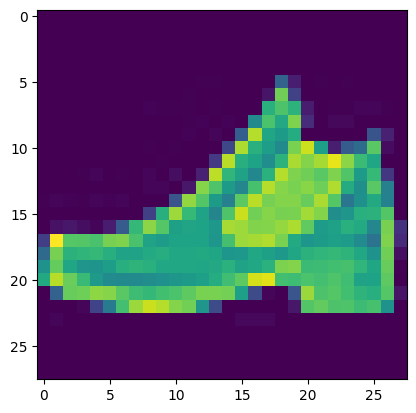

In [9]:
plt.imshow(np.reshape(X_train_list[1], (28, 28, 1)));

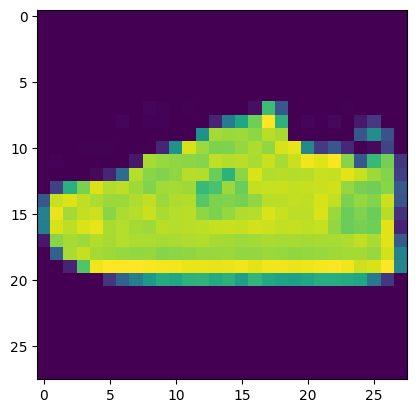

In [12]:
plt.imshow(np.reshape(X_train_list[59999], (28, 28, 1)));

### let's dive into the logistic regression  problem 

In [10]:
from sklearn.linear_model import LogisticRegression

In [15]:
logreg = LogisticRegression(random_state= 12).fit(X_train, y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# the accuracy of the model
logreg.score(X_train, y_train)

0.8621166666666666

86% of the time this model can detect any of these images correctly. Let's check actually how well it works on the test: 

In [13]:
logreg.score(X_test, y_test)

0.8544

In [14]:
# let's check the model to predict
logreg.predict([X_train_list[3]])

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

The fourth label is 0

In [83]:
#biểu diễn predict và actual của label, do phạm vị của label rất hẹp 0-9, nên ta không thể quan sát rõ sự khác biệt nếu chọn mẫu lớn
X_20 = X_train_list[0:20]
y_pred_train_20 = logreg.predict(X_20)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


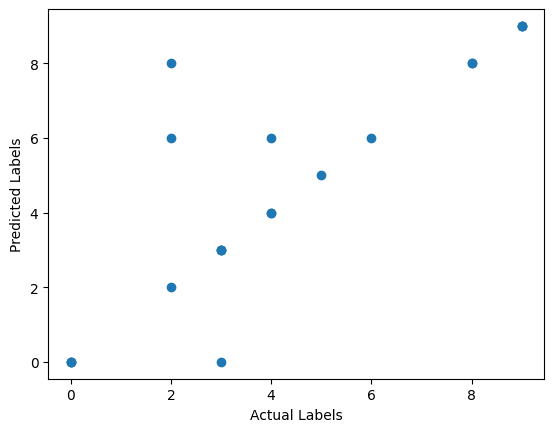

In [85]:
plt.scatter(y_train[0:20], y_pred_train_20)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

### biểu diễn predict và actual của label với mẫu lớn ~ 1000

In [87]:
X_1000 = X_train_list[0:1000]
X_1000 = np.array(X_1000)
print(type(X_1000))

<class 'numpy.ndarray'>


In [88]:
y_pred_train_1000 = logreg.predict(X_1000)
print(type(y_pred_train_1000))

<class 'numpy.ndarray'>


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


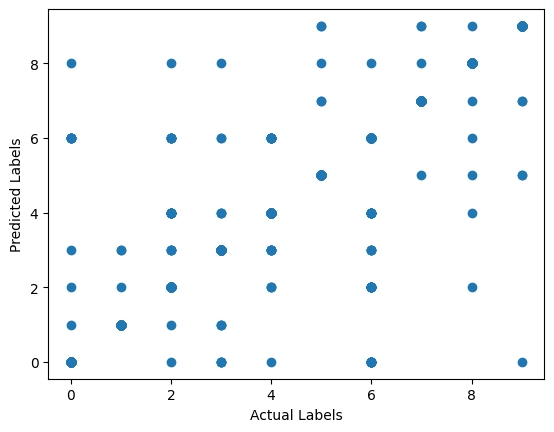

In [89]:
plt.scatter(y_train[0:1000], y_pred_train_1000)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

Do mẫu quá lớn, chỉ 1 outlier có thể biểu diễn sai. Cần dùng Heatmap với filter size (in Tableau, Power BI, Python)

In [ ]:
# Dù định dạng là array, list hay series đều biểu diễn được
covert to series:  pd.Series(list/array)
covert to list:    array.tolist()
covert to array:   np.array(list/series)
covert to DataFrame: pd.DataFrame(array/list)
chỉ series và dataframe có thể save to csv

In [73]:
# ghép series/dataframe bằng pd.concat, axis =1 ghép theo cột, axis =0 ghép theo hàng
y_train_1000_df = pd.concat([y_train_1000, y_pred_train_1000], axis = 1)  
print(type(y_train_1000_df))

<class 'pandas.core.frame.DataFrame'>


In [78]:
y_train_1000_df

,0,1
0,2,8
1,9,9
2,6,6
3,0,0
4,3,3
...,...,...
995,8,8
996,1,1
997,4,4
998,7,5


In [79]:
# Save to csv
y_train_1000_df.to_csv('y_pred_train_1000.csv')

## Precision, Recall and F1 Score for Multiclass Classification - sklearn

sau bước này:
* #let's check the model to predict
* logreg.predict([X_train_list[3]])

In [16]:
y_pred = logreg.predict(X_test)

In [17]:
from sklearn import metrics

In [18]:
cm = metrics.confusion_matrix(y_test, y_pred)

In [19]:
cm

array([[817,  11,  18,  31,   7,   0,  96,   0,  19,   1],
       [  1, 976,   4,  13,   0,   2,   4,   0,   0,   0],
       [ 15,   2, 762,  13, 122,   0,  74,   0,  12,   0],
       [ 30,  28,  16, 871,  29,   0,  23,   0,   3,   0],
       [  1,   2,  72,  34, 822,   1,  65,   0,   3,   0],
       [  2,   2,   0,   0,   0, 883,   1,  64,  10,  38],
       [148,   7, 105,  31, 109,   0, 584,   0,  16,   0],
       [  0,   0,   0,   0,   0,  27,   0, 932,   1,  40],
       [  2,   2,   9,   2,   5,   7,  17,   4, 950,   2],
       [  0,   0,   0,   0,   0,  14,   0,  36,   3, 947]], dtype=int64)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

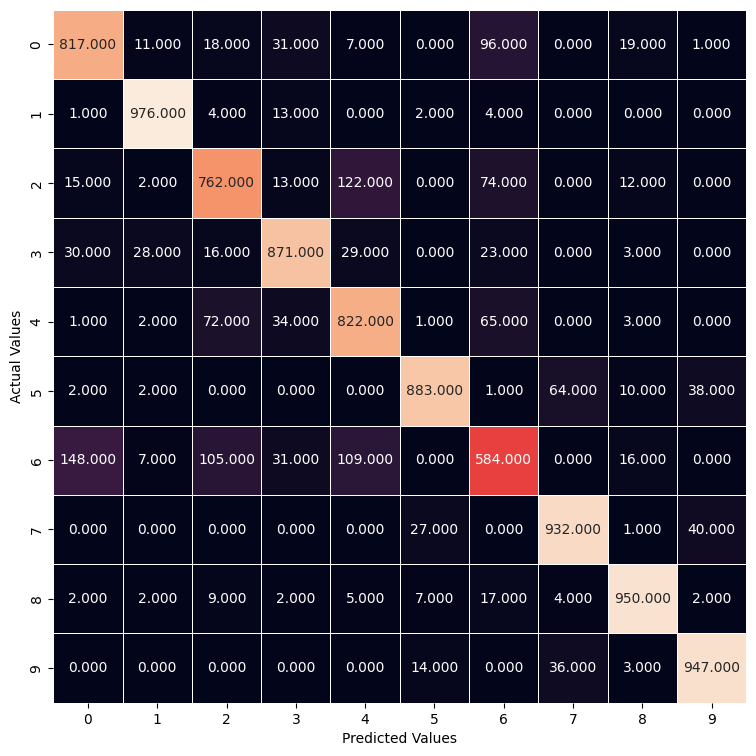

In [21]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot= True, fmt = '0.3f', linewidth = 0.5,
           square = True, cbar = False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### Precision:
![](https://i.imgur.com/aJBj0Pc.jpg)

### Recall:
![](https://i.imgur.com/5rwjy2n.jpg)

### F1 Score:
![](https://i.imgur.com/KOQR8qt.jpg)

![](https://i.imgur.com/cPzAomk.jpg)

In [22]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.95      0.98      0.96      1000
           2       0.77      0.76      0.77      1000
           3       0.88      0.87      0.87      1000
           4       0.75      0.82      0.79      1000
           5       0.95      0.88      0.91      1000
           6       0.68      0.58      0.63      1000
           7       0.90      0.93      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.92      0.95      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

### Predict bằng XGBoost algorithm

In [35]:
# import libraries for ML 
import xgboost as xgb 
from sklearn.model_selection import KFold, cross_val_score, train_test_split 
from sklearn.metrics import classification_report, confusion_matrix 

In [41]:
#XGBoost Multiclassification Model 
#max_depth is depth of decision tree,learning_rate: tỷ lệ học 
label_xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, objective ='multi:softprob',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}' 
      .format(label_xgb_model.score(X_train, y_train))) 

print('Accuracy of XGB classifier on test set: {:.2f}'
      .format(label_xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on test set: 0.81


In [36]:
label_xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, objective ='multi:softprob',n_jobs=-1).fit(X_train, y_train)

In [37]:
label_xgb_model.score(X_train, y_train)

1.0

In [38]:
label_xgb_model.score(X_test, y_test)

0.81

Because size of sample in this XGBoost Multiclassification Model  is only 100 samples.

In [40]:
y_pred = label_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.91      1.00      0.95        10
           2       0.75      0.64      0.69        14
           3       0.82      0.90      0.86        10
           4       0.76      0.76      0.76        17
           5       1.00      0.86      0.92         7
           6       0.53      0.73      0.62        11
           7       0.86      0.86      0.86         7
           8       1.00      1.00      1.00         8
           9       0.88      1.00      0.93         7

    accuracy                           0.81       100
   macro avg       0.85      0.83      0.83       100
weighted avg       0.83      0.81      0.81       100

